In [562]:
import sys
import sklearn
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression, SGDRegressor

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

EPS = np.finfo(float).eps

## Create and plot Random Dataset

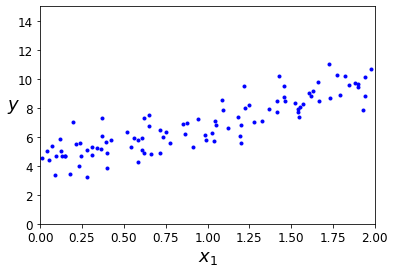

In [563]:
num_samples = 100
X = 2 * np.random.rand(num_samples, 1)
y = 4 + 3 * X + np.random.randn(num_samples, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Do the linear regression from the scikit learn

In [564]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

x_lin = np.linspace(0, 2, 200)
y_lin = [np.polyval([lin_reg.coef_[0], lin_reg.intercept_], x) for x in x_lin]

lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

## Solve with gradient descent

In [565]:
eta = 0.1  # learning rate
T = 1000

X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

w = np.zeros(2)
w_sum = np.zeros(2)

start = time()

a = eta * X_b.T
b = a.dot(y).T[0]
for t in range(T):
    w_last = w.copy()
    w -= 2 * (a.dot([X_b[i].dot(w) for i in range(num_samples)]) - b) / num_samples
    w_sum += w

end = time()

gd_intercept, gd_coeff = w_sum / T
y_gd = [np.polyval([gd_coeff, gd_intercept], x) for x in x_lin]

[gd_intercept, gd_coeff], end - start

([4.182222293915793, 2.789912567078621], 0.13923931121826172)

## Plot SciKit Linear Reg. against GD

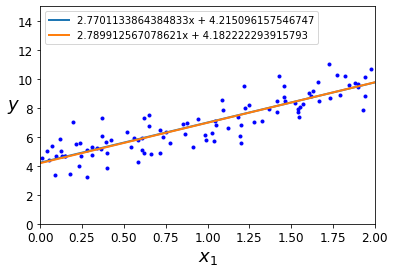

In [566]:
plt.plot(X, y, "b.")
plt.plot(x_lin, y_lin, "-", linewidth=2, label=f"{lin_reg.coef_[0][0]}x + {lin_reg.intercept_[0]}")
plt.plot(x_lin, y_gd, "-", linewidth=2, label=f"{gd_coeff}x + {gd_intercept}")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left", fontsize=10)
plt.show()

## 

## Do the SGD with scikit learn

In [567]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

y_sgd = [np.polyval([sgd_reg.coef_, sgd_reg.intercept_], x) for x in x_lin]

sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

## Solve with stochastic gradient descent

In [568]:
m = num_samples // 100

t = 0
w = np.zeros(2)
w_sum = np.zeros(2)

def learning_schedule(t):
    return T / (t + T / eta)

start = time()

for t in range(T):
    random_indicies = np.random.randint(num_samples, size=m)
    etas = [learning_schedule(t * m + i) for i in range(m)]

    a = etas * X_b[random_indicies].T
    b = a.dot(y[random_indicies]).T[0]
    w -= 2 * (a.dot([X_b[i].dot(w) for i in random_indicies]) - b) / m
    w_sum += w

end = time()

sgd_intercept, sgd_coeff = w_sum / T
y_sgd2 = [np.polyval([sgd_coeff, sgd_intercept], x) for x in x_lin]

[sgd_intercept, sgd_coeff], end - start

([4.204321364841701, 2.7988814169504472], 0.05739235877990723)

## Plot SciKit SGD against SGD

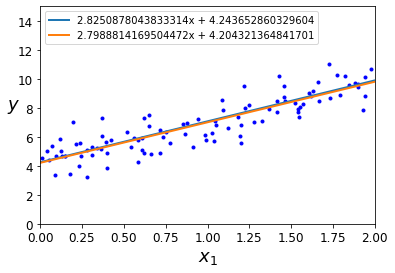

In [569]:
plt.plot(X, y, "b.")
plt.plot(x_lin, y_sgd, "-", linewidth=2, label=f"{sgd_reg.coef_[0]}x + {sgd_reg.intercept_[0]}")
plt.plot(x_lin, y_sgd2, "-", linewidth=2, label=f"{sgd_coeff}x + {sgd_intercept}")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left", fontsize=10)
plt.show()

## Plot GD against SGD

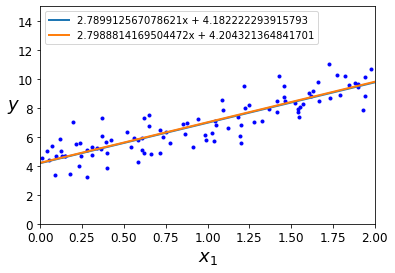

In [570]:
plt.plot(X, y, "b.")
plt.plot(x_lin, y_gd, "-", linewidth=2, label=f"{gd_coeff}x + {gd_intercept}")
plt.plot(x_lin, y_sgd2, "-", linewidth=2, label=f"{sgd_coeff}x + {sgd_intercept}")

plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left", fontsize=10)
plt.show()